In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Bloch, QobjEvo, basis, sesolve, sigmay, sigmaz

%matplotlib inline

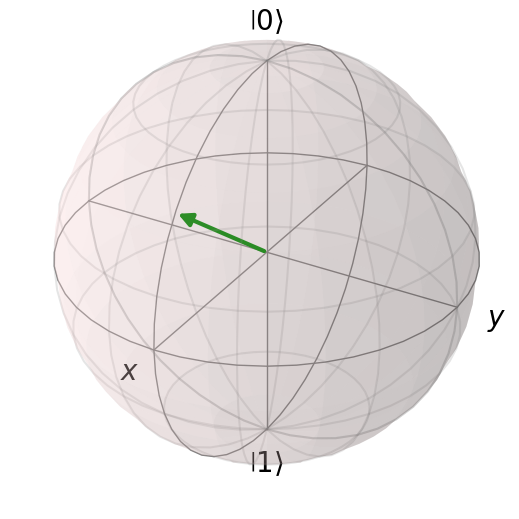

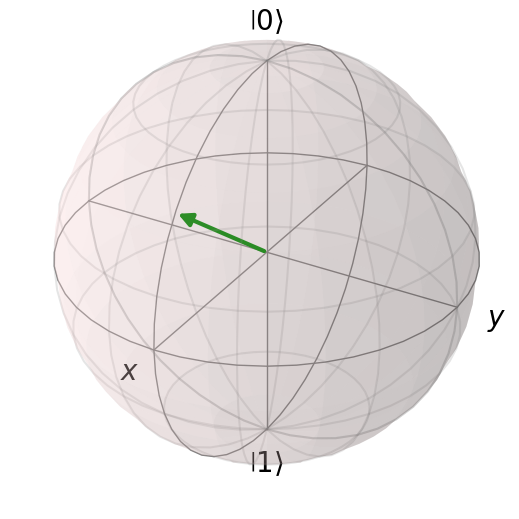

In [3]:
psi = (2.0 * basis(2,0) + basis(2,1)).unit()
b = Bloch()
b.add_states(psi)
b.show()

Magnetic field in z-direction with `qutip.sigmaz()` for the corresponding pauli matrix

In [4]:
H = sigmaz()
times = np.linspace(0, 10, 100)
result = sesolve(H, psi, times, [sigmay()])

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


`sigmay()` passes as the `sesolve.result.expect` stored as a 2D array, accesses by `result.expect[0]` 

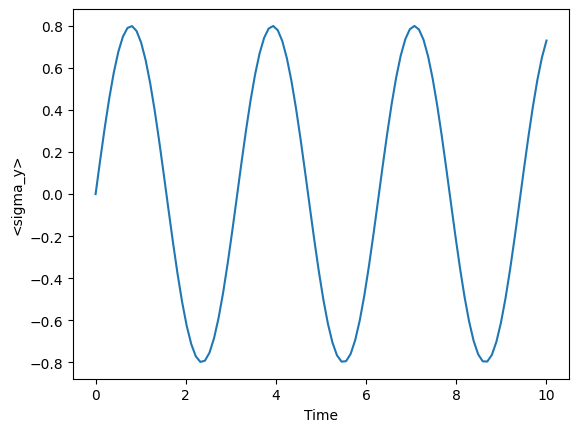

In [5]:
plt.plot(times, result.expect[0])
plt.xlabel("Time"), plt.ylabel("<sigma_y>")
plt.show()

With varying magnetic field

In [6]:
def linear(t, args):
    return 0.3 * t

def periodic(t, args):
    return np.cos(0.5 * t)

H_lin = QobjEvo([[sigmaz(), linear]], tlist=times)
H_per = QobjEvo([[sigmaz(), periodic]], tlist=times)
# Hamiltonian input as QobjEvo with [[.Qobj, .Coefficients]]
# Only works as function with "t" as variable

QobjEvo is used as the Hamiltonian for the Schrodinger equation solver
`sigmaz()` is the Hamiltonian

In [7]:
result_lin = sesolve(H_lin, psi, times, [sigmay()])
result_per = sesolve(H_per, psi, times, [sigmay()])

`qutip.qeye()` is identity operator

In [8]:
size=4
Id = qutip.qeye(size)

def coeff_with_args(t, args):
    return t + args["delta"]


td_args = Id * qutip.coefficient(coeff_with_args, args={"delta": 1.0})
td_args(2)
# 4x4 Identity operator * (coefficient of t=2 then + 'delta' argument of 1)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]

In [9]:
size = 4
t = 1.0
a = qutip.destroy(size)
ad = qutip.create(size)
n = qutip.num(size)
Id = qutip.qeye(size)


qutip.QobjEvo([n])(2)
# The call variable is the time




Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 3.]]

In [10]:
def cos_t(t):
    return np.cos(t)

function_form = n + (a + ad) * qutip.coefficient(cos_t)

function_form(2)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.         -0.41614684  0.          0.        ]
 [-0.41614684  1.         -0.5885205   0.        ]
 [ 0.         -0.5885205   2.         -0.72078746]
 [ 0.          0.         -0.72078746  3.        ]]

for more complex - state with memory - callable form

In [12]:
class callable_time_dependence:
    def __init__(self, add):
        self.add = add

    def __call__(self, t, args):
        return self.add + np.cos(t)
    
callable_form = qutip.QobjEvo([n, [a + ad, callable_time_dependence(0)]])
# passed as 
callable_form(2)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.         -0.41614684  0.          0.        ]
 [-0.41614684  1.         -0.5885205   0.        ]
 [ 0.         -0.5885205   2.         -0.72078746]
 [ 0.          0.         -0.72078746  3.        ]]

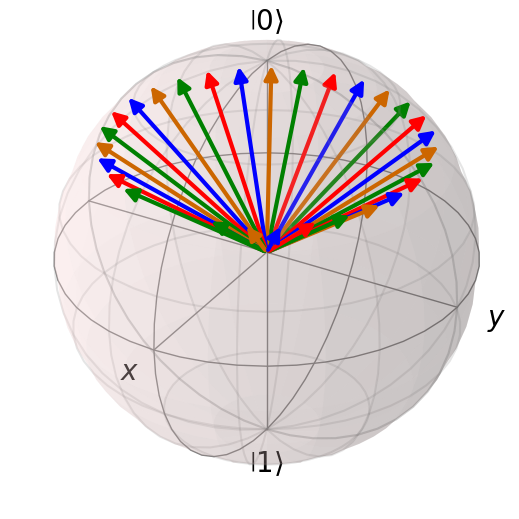

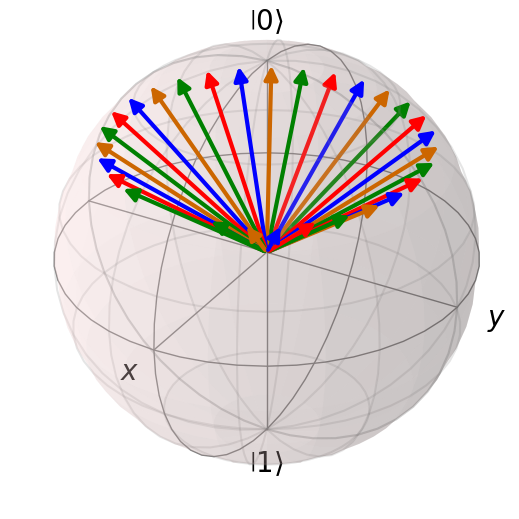

In [15]:
res = sesolve(H, psi, times, [])
# b = Bloch()
# b.add_states(res.states[1:30])
b.show()